In [1]:
# read dataset file

import pandas as pd
data_df = pd.read_csv('loan_data_set.csv')

In [2]:
data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# droping non usable feature from dataset

data_df = data_df.drop('Loan_ID', axis=1)
data_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# counting null values

data_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


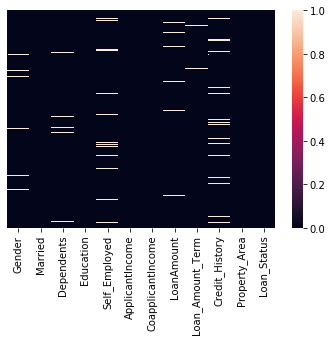

In [6]:
# displaying null values graphically

import seaborn as snb
snb.heatmap(data_df.isnull(), yticklabels=False, cbar=True)

In [8]:
# filling null values with mean and mode values of corresponding features

for feature in data_df:
    data_df['Gender'] = data_df['Gender'].fillna(data_df['Gender'].mode()[0]) 
    data_df['Married'] = data_df['Married'].fillna(data_df['Married'].mode()[0])
    data_df['Dependents'] = data_df['Dependents'].fillna(data_df['Dependents'].mode()[0])
    data_df['Self_Employed'] = data_df['Self_Employed'].fillna(data_df['Self_Employed'].mode()[0])
    data_df['LoanAmount'] = data_df['LoanAmount'].fillna(data_df['LoanAmount'].mean())
    data_df['Loan_Amount_Term'] = data_df['Loan_Amount_Term'].fillna(data_df['Loan_Amount_Term'].mean())
    data_df['Credit_History'] = data_df['Credit_History'].fillna(data_df['Credit_History'].mode()[0])

In [9]:
data_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
data_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [11]:
data_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [14]:
# transforming categorical values as separate features

final_data = pd.get_dummies(data_df, drop_first=True)

In [15]:
final_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [18]:
final_data.shape

(614, 15)

In [16]:
final_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.018615,0.058809,0.051708,0.040861,-0.034650,0.156687,-0.140760,0.127180,-0.014246,-0.000598,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.082912,0.075948,-0.029769,0.010016,0.041491,-0.062290,-0.016100,-0.027044,0.022776,-0.059187
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.001431,0.107930,0.147141,0.062359,0.019547,0.153200,-0.166998,0.115260,-0.008273,-0.033220,-0.036416
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.073567,-0.100863,-0.086946,-0.007786,-0.077071,-0.077242,-0.033943,0.061365,-0.096683,-0.020974
Credit_History,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.009170,0.010938,0.009757,0.007987,-0.060473,-0.073658,-0.001550,0.035976,-0.016934,0.540556
Gender_Male,0.058809,0.082912,0.107930,-0.073567,0.009170,1.000000,0.364569,-0.004466,0.129953,0.096319,0.045364,-0.000525,-0.108623,0.034530,0.017987
Married_Yes,0.051708,0.075948,0.147141,-0.100863,0.010938,0.364569,1.000000,0.113853,0.249547,0.132566,0.012304,0.004489,0.005845,0.000546,0.091478
Dependents_1,0.040861,-0.029769,0.062359,-0.086946,0.009757,-0.004466,0.113853,1.000000,-0.198046,-0.134337,-0.013355,0.082044,0.011661,0.069320,-0.038740
Dependents_2,-0.034650,0.010016,0.019547,-0.007786,0.007987,0.129953,0.249547,-0.198046,1.000000,-0.133547,0.020822,0.032434,-0.012017,0.016569,0.062384
Dependents_3+,0.156687,0.041491,0.153200,-0.077071,-0.060473,0.096319,0.132566,-0.134337,-0.133547,1.000000,0.055288,0.003278,0.007863,-0.047460,-0.026123


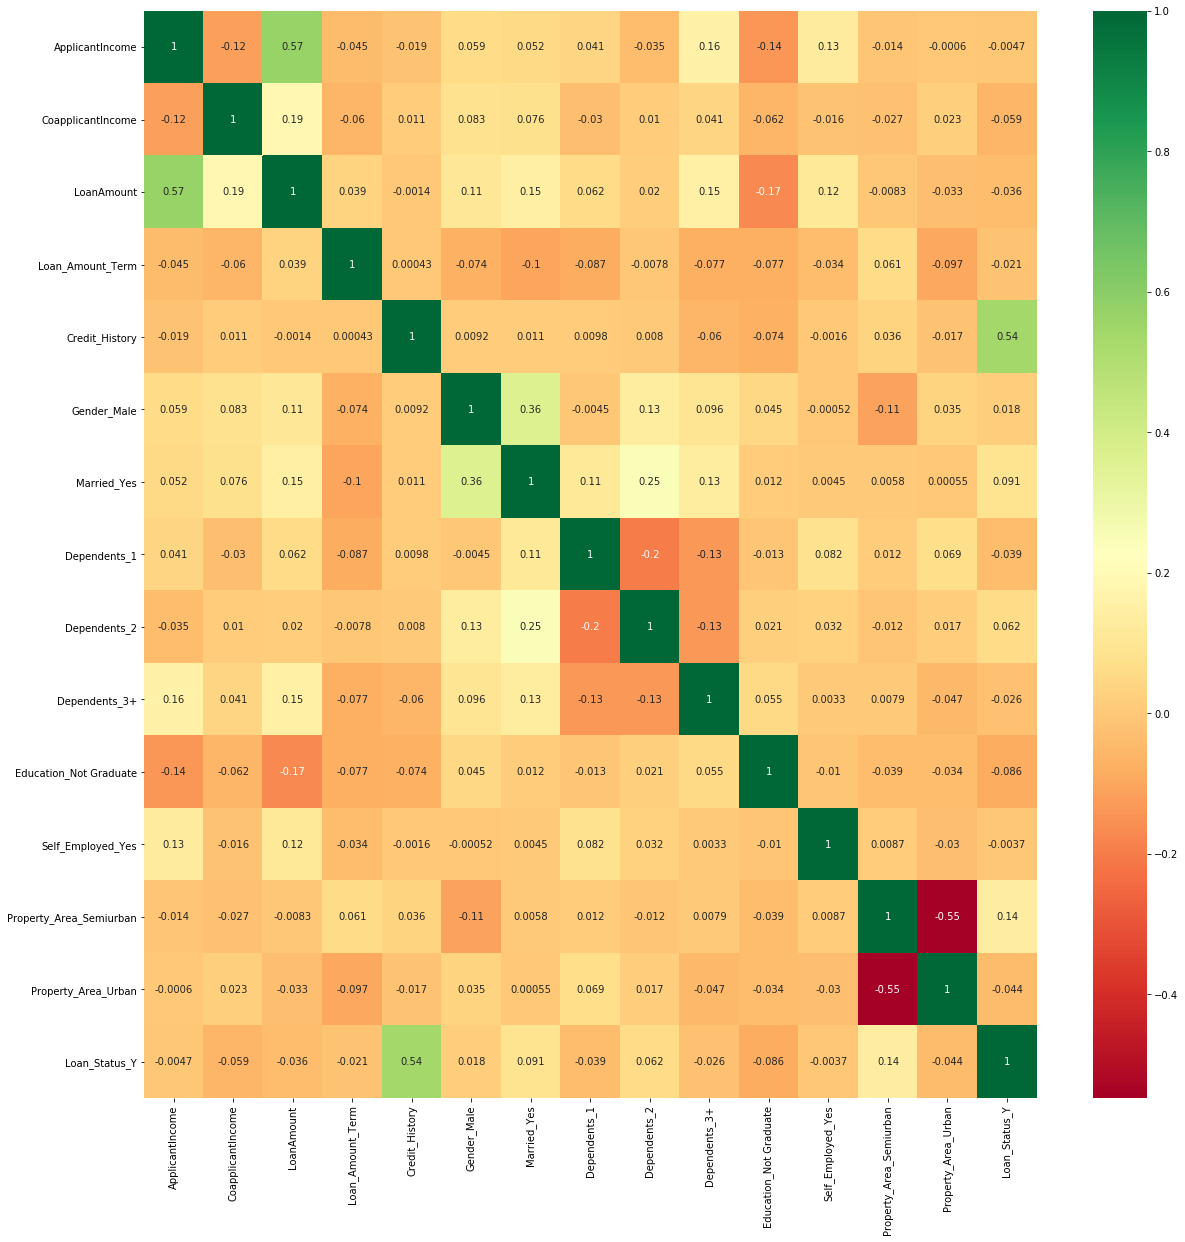

In [21]:
# graphically showing correlation between features

import matplotlib.pyplot as plt
corrmat = final_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
snb.heatmap(final_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
final_data.to_csv('pre_proc_data.csv', index=False)